In [1]:
from fastai.vision import *

下载google图片用的javascript代码

Go to [Google Images](http://images.google.com) and search for the images you are interested in.   


urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));  
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [21]:
folder = 'black'
file = 'black.csv'

In [24]:
folder = 'teddys'
file = 'teddys.csv'

In [27]:
folder = 'grizzly'
file = 'grizzly.csv'

In [28]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [30]:
path.ls()

[PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/grizzly.csv'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys.csv'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/black.csv')]

In [31]:
classes = ['teddys','grizzly','black']

In [29]:
download_images(path/file, dest, max_pics=200)

验证图片，把不能用的删了

In [32]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


制作数据集

In [33]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4,bs=16).normalize(imagenet_stats)

In [34]:
data.classes

['black', 'grizzly', 'teddys']

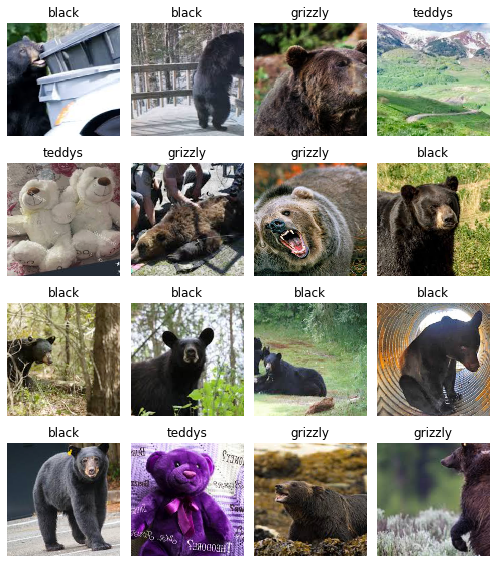

In [35]:
data.show_batch(rows=4, figsize=(7,8))

In [36]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 480, 120)

训练模型

In [37]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.699617,0.012094,0.000000,00:48
1,0.468305,0.080920,0.033333,00:52
2,0.311798,0.039972,0.016667,00:52
3,0.256187,0.059981,0.025000,00:52


/home/jameson/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/home/jameson/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior f

In [39]:
learn.save('stage-1')

In [40]:
learn.unfreeze()

In [41]:
learn.lr_find()

/home/jameson/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/home/jameson/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior f

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


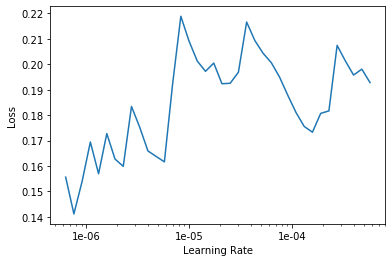

In [42]:
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.288331,0.070113,0.025000,01:14
1,0.215353,0.074014,0.033333,01:16


/home/jameson/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/home/jameson/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior f

模型解释

In [44]:
learn.load('stage-2');

interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

FileNotFoundError: [Errno 2] No such file or directory: 'data/bears/models/stage-2.pth'

清理分类错误和重复的图片

In [ ]:
from fastai.widgets import *